## Imports
 **Import the usual suspects. :) **

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

import warnings

warnings.filterwarnings(action='ignore')

## Obtain Data

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp['text length'] = yelp['text'].apply(len)

# EDA

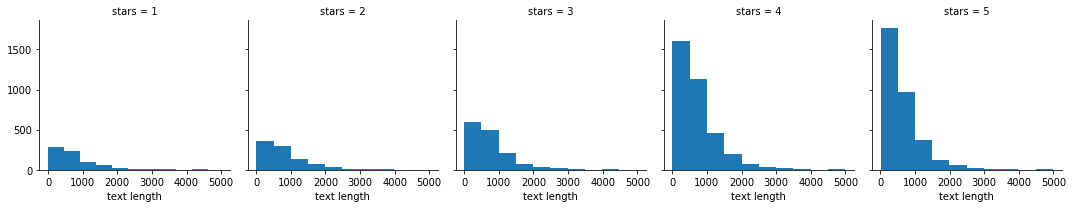

In [9]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')
plt.show()

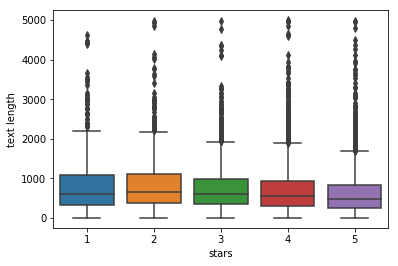

In [10]:
sns.boxplot(x='stars', y='text length', data=yelp)

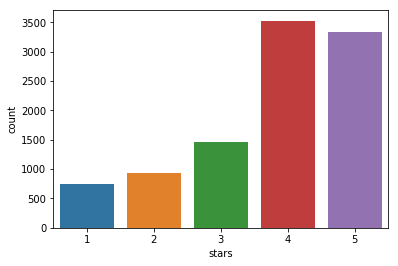

In [11]:
sns.countplot(x='stars', data=yelp)

In [12]:
yelp.groupby(by='stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [14]:
yelp.groupby(by='stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


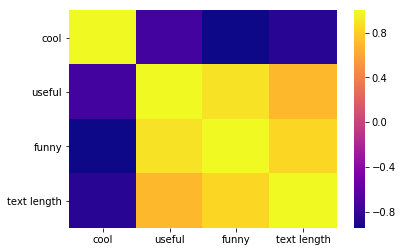

In [17]:
sns.heatmap(data=(yelp.groupby(by='stars').mean().corr()), cmap='plasma')

## NLP Classification Task


In [24]:
yelp_class = yelp[(yelp.stars == 1) | (yelp.stars == 5)]
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [31]:
X = yelp_class['text']
y = yelp_class['stars']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()

In [34]:
X = CV.fit_transform(raw_documents = X)

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training a Model


In [38]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [39]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Predictions and Evaluations


In [41]:
pred = nb.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

             precision    recall  f1-score   support

          1       0.84      0.62      0.71       261
          5       0.92      0.97      0.94      1088

avg / total       0.90      0.90      0.90      1349



[[ 163   98]
 [  32 1056]]


# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
from sklearn.pipeline import Pipeline

In [47]:
pipeline = Pipeline([('bow', CountVectorizer()), ('tfidt', TfidfTransformer()), ('classifier', MultinomialNB())])

## Using the Pipeline


### Train Test Split

In [48]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

### Predictions and Evaluation

In [52]:
pred = pipeline.predict(X_test)

In [53]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))


             precision    recall  f1-score   support

          1       1.00      0.00      0.01       228
          5       0.81      1.00      0.90       998

avg / total       0.85      0.81      0.73      1226



[[  1 227]
 [  0 998]]
